# Data Wrangling: We Rate Dogs
#  Data Gathering

In [148]:
import pandas as pd
import numpy as np
import os
import json
import requests
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import re
import datetime
from IPython.display import Image
import seaborn as sns 


In [149]:
#obtain data from source 1
df_info=pd.read_csv('twitter-archive-enhanced.csv')

In [150]:
df_info.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [151]:
import tweepy

In [152]:
# obtain data from source 2
folder_name = 'image_predictions'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [153]:
#get data
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [154]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb')as file:
    file.write(response.content)
    

In [155]:
predictions=pd.read_csv('image-predictions.tsv',sep='\t' )

In [156]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [157]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [158]:
# import API detailes into working memory
with open("auth_k.txt", "r") as file:
    consumer_key = file.readline()[:-1]
    consumer_secret =file.readline()[:-1]
    access_token = file.readline()[:-1]
    access_secret = file.readline()[:-1]

# Create Connection to API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)




In [159]:

# Create list of twitter ids
tweet_ids = df_info.tweet_id.values.astype(list)
tweet_ids



array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=object)

In [160]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
   
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
          
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
           
            fails_dict[tweet_id] = e
            pass

end = timer()
print(end - start)


Rate limit reached. Sleeping for: 636
Rate limit reached. Sleeping for: 638


1975.90151544963


In [162]:
# Read text file line by line to create dataframe
tweets_api=[]
with open('tweet_json.txt') as json_file:
    for line in json_file:
        try:
            tweet=json.loads(line)
            tweets_api.append(tweet) 
        except:
            continue
df_api=pd.DataFrame(tweets_api,columns=list(tweets_api[0].keys()))
df_api.head()            
            

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8295,37978,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6125,32601,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4055,24550,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8433,41306,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9135,39500,False,False,False,False,en


In [163]:
# Reduce df_api to the necessary columns
df_redapi = df_api[['id', 'retweet_count', 'favorite_count']]

df_redapi.head()

,id,retweet_count,favorite_count
0,892420643555336193,8295,37978
1,892177421306343426,6125,32601
2,891815181378084864,4055,24550
3,891689557279858688,8433,41306
4,891327558926688256,9135,39500


### Make copies for original data for cleaning

In [164]:
# Save Dataframe for Visual Assessment
df_redapi.to_csv("tweet_json.csv")

# Copy Dataframes for Cleaning
df_clean =df_info.copy()
predictions_clean = predictions.copy()
df_redapi_clean = df_redapi.copy()

# Data Assessment
## Visual Assessment
## Quality Issues
Archieve table:
* Retweets are included in the dataset
* text column includes both text and short version of URL to the tweet
* Large missing values in columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls
* missing counts for doggo, floofer, pupper and puppo
* the rating_numerator is bigger than the rating_ denominator 
* Nulls are identified as "None" for name, doggo, floofer, pupper, and puppo columns
* Some names such as "a" are not names


## Tidiness Issues
archive table
* doggo, floofer, pupper and puppo columns reppresent the types of dogs, so they could be combined into a single column named dog_type.
predictions table
* There are multiple columns containing the same type of data, e.g. p1 $\rightarrow$ p3_dog represent the same type of data, all are dog breed predications
* archive table and api table could be merged to one table


## Programatic Assessment
## Quality Issues:
archive table:
* the rating_numerator and rating_denominator of some rows do not make sense,  the minimum rating_numerator and rating_denominator are 0s, some rows the denominator is larger than 10, eg: index 1121, rating_numerator=204, rating denominator=170;the maximum numerator is 1776
the predictions table
* part of predictions and api info is missing, the archive table contains 2356 observations, while the prediction table contains 2075 observations in total, the api table contains 2342 observations
the api_data table
* tweet_id is incorrectly labeled as ID

## Tidiness Issues:






In [165]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [166]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [167]:
# check if the top three predictions tell what is not a dog
pred_filter = predictions.query('p1_dog ==False & p2_dog ==False & p3_dog ==False')

pred_filter.count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [168]:
#check how accurate the top 1 prediction is when the picture selected is a dog
pred_p1 = predictions.query('p1_dog ==True')

pred_p1.count()

tweet_id    1532
jpg_url     1532
img_num     1532
p1          1532
p1_conf     1532
p1_dog      1532
p2          1532
p2_conf     1532
p2_dog      1532
p3          1532
p3_conf     1532
p3_dog      1532
dtype: int64

In [169]:
df_redapi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id                2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [170]:
pred_filter = predictions.query('p1_dog ==False & p2_dog ==False & p3_dog ==False')

pred_filter.count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

# Data Cleaning
## Summary of Assessment
## Quality Issues

1. Retweets are included in the dataset
2. Text column includes both text and short version of URL to the tweet
3. Large missing values in columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls
4. The rating_numerator and rating_denominator of some rows do not make sense,  the minimum rating_numerator and rating_denominator are 0s, some rows the denominator is larger than 10, eg: index 1121, rating_numerator=204, rating denominator=170;the maximum numerator is 1776
5. Nulls are identified as "None" for name, doggo, floofer, pupper, and puppo columns
6. Some names such as "a", "an", "the" are not names
7. Part of predictions and api info is missing, the archive table contains 2356 observations, while the prediction table contains 2075 observations in total, the api table contains 2342 observations
8. tweet_id is incorrectly labeled as ID in api table

## Tidiness Issues
1. Doggo, floofer, pupper and puppo columns reppresent the types of dogs, so they could be combined into a single column named dog_type.
2. There are multiple columns containing the same type of data, e.g. p1, p2, p3 all contain dog breed predictions, they could be combined into one single colunm named breed_pred
3. The api table could be merged to the archive table




# Define Cleaning Process
## Quality Issues
1. remove rows are retweets or replies.
2. remove unneccessary columns from df_clean, including  in_reply_to_status_id, in_reply_to_user_id
3. remove shortened URL from text column in the df_clean dataframe
4. use regular expressions to find the numerator and denominator of the score and place save them in the correct column ("numerator", "denominator")
5. find dog names do no make sense, find if missing names are shown in text column, if not, replace "None" with Null 
6. replace "None" with Null for missing counts of dog type including columns doggo, floofer, pupper, and puppo
7. Rename "id" to "tweet_id" in api_clean
8. make the number of observations consistent among tables
## Tidiness Issues
1. creat a new cloumn named dog_type, merge doggo, floofer, pupper, and puppo into this new column, and remove  doggo, floofer, pupper, and puppo columns.
2. creat 3 new cloumns: prediction, confidence, dog, if p1_dog, p2_dog, p3_dog are all False, put null values for the new columns; if  p1_dog if True, put p1, p1_conf, p1_dog in new columns; else if p2_dog is False ,put p3, p3_conf, p3_dog
3. merge all three cleaned table into one table, and named "dog_rate_wrangling"




## Define
1. remove rows are retweets or replies.

## Code

In [171]:
""" 1. remove rows are retweets and replies. """
# check rows to remove for replies
df_clean["in_reply_to_status_id"] = df_clean["in_reply_to_status_id"].astype(str)
replies = df_clean.query('in_reply_to_status_id !="nan" ')['tweet_id'].index
df_clean.drop(replies, inplace=True)
#check rows to remove for retweets

df_clean["retweeted_status_id"] =df_clean["retweeted_status_id"].astype(str)
retweets =df_clean.query('retweeted_status_id !="nan" ')['tweet_id'].index
df_clean.drop(retweets, inplace=True)



## Test

In [172]:
# Check nulls after remove replies and retweets
df_clean["in_reply_to_status_id"].isnull().sum()
df_clean["retweeted_status_id"].isnull().sum()

0

## Define
2. remove unneccessary columns from df_clean, including in_reply_to_status_id, in_reply_to_user_id

## Code

In [173]:
""" 2. remove unneccessary columns. """
df_clean.info()
#remove unneccessary columns
df_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)











<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         2097 non-null object
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           2097 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(2), int64(3), object

## Test

In [174]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


## Define
3. remove shortened URL from text column in the df_clean dataframe

## Code

In [175]:
"""3. Remove shortened URL from the end of the "text" column in the df_info_clean dataframe"""
# remove the url links for text column
df_clean['text']=df_clean['text'].str.replace('http\S+', '', case=False)
# check if the urls are successfully removed



## Test

In [176]:
df_clean['text'].str.contains('http\S+').sum()

0

## Define
4. extract the numerator and denominator of the score from the text column and save them in the correct column ("numerator", "denominator")

## Code

In [179]:
""" 4. extract the numerator and denominator of the score from the text column and save them 
in the correct column ("numerator", "denominator")"""
# check if every observations in text column contains the rating
df_clean_numerator=df_clean["text"].str.contains('\d+/10')
df_clean_numerator.count()
#remove rows that do not contain the the rating in the text column
df_clean=df_clean[df_clean_numerator]




In [197]:
# extract numerators from the text column and put the values in the rating_numerator column
cols=['rating_numerator', 'rating_denominator']
df_clean[cols]=df_clean['text'].str.extract(r'((?:\d+\.)?\d+)/(\d+)', expand=True)
df_clean['rating_numerator']=df_clean['rating_numerator'].astype(float)
# set denominator to 10
df_clean['rating_denominator']=10


## Test

In [198]:
df_clean.query('tweet_id ==786709082849828864' )['rating_numerator']

695    9.75
Name: rating_numerator, dtype: float64

* https://stackoverflow.com/questions/46608088/split-contents-of-a-python-dataframe-into-new-columns?rq=1

In [199]:
df_clean.describe()


,tweet_id,rating_numerator,rating_denominator
count,2.085000e+03,2085.000000,2085.0
mean,7.366286e+17,11.662245,10.0
std,6.719643e+16,39.752090,0.0
min,6.660209e+17,0.000000,10.0
25%,6.767764e+17,10.000000,10.0
50%,7.098528e+17,11.000000,10.0
75%,7.878106e+17,12.000000,10.0
max,8.924206e+17,1776.000000,10.0


In [200]:
df_clean.query('rating_numerator==1776').index

Int64Index([979], dtype='int64')

In [201]:
df_clean.loc[979]

tweet_id                                             749981277374128128
timestamp                                     2016-07-04 15:00:45 +0000
source                <a href="https://about.twitter.com/products/tw...
text                  This is Atticus. He's quite simply America af....
expanded_urls         https://twitter.com/dog_rates/status/749981277...
rating_numerator                                                   1776
rating_denominator                                                   10
name                                                            Atticus
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 979, dtype: object

* Now all the denominators are 10, the highest numerator is 1776, So I find the source of the the highest rated dog on tweeter, the score matches what is posted online.

## Define
5. find dog names do no make sense, find if missing names are shown in text column, if not, replace "None" with Null

## Code

In [202]:
"""5. clean the missing value and wrong values for name column"""
# names are is most likely apper after 'This is ...' 'name is...', 'Meet..' , 'Say hello to', check the name in the text column
name_list=['This is', 'name is', 'Meet', 'Say hello to', 'this is']
pattern='|'.join(name_list)
df_clean['text'].str.contains(pattern).sum()



1495

In [203]:
# check the names in df_clean['text']
df_clean['name'].value_counts()
# replace 'None' and wrong names like 'a', 'the','an' with nulls
names=['None', 'a','an','the']
for name in names:
    df_clean['name'].replace(name, np.nan, inplace=True)

## Test

In [204]:

df_clean['name'].value_counts()

Charlie        11
Lucy           11
Oliver         10
Cooper         10
Tucker          9
Penny           9
Lola            8
Sadie           8
Winston         8
Daisy           7
Toby            7
Bella           6
Jax             6
Oscar           6
Koda            6
Stanley         6
Bo              6
Bailey          6
Leo             5
Dave            5
Louis           5
Chester         5
Rusty           5
Scout           5
Buddy           5
Milo            5
Bentley         5
Cassie          4
Gary            4
Sophie          4
               ..
Eugene          1
Rizzy           1
Chesterson      1
Socks           1
Maude           1
Sephie          1
Tassy           1
Anthony         1
Bell            1
Hector          1
Birf            1
Jed             1
Doobert         1
Rose            1
Mac             1
Tycho           1
Lilli           1
infuriating     1
Sandra          1
Georgie         1
Lucia           1
Maisey          1
Rambo           1
Banjo           1
Harrison  

## Define
6. replace "None" with Null for missing counts of dog type including columns doggo, floofer, pupper, and puppo


## Code

In [205]:
"""6. redifine None values as nulls;
  merge doggo, floofer, pupper, and puppo columns"""
#fill the 'None' values with normal null expressions
cols=['doggo', 'floofer', 'pupper', 'puppo']
for column in cols:
    df_clean[column].replace('None', np.nan, inplace=True)



## Test


In [206]:
df_clean.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
expanded_urls            3
rating_numerator         0
rating_denominator       0
name                   662
doggo                 2002
floofer               2075
pupper                1855
puppo                 2061
dtype: int64

## Define
7. merge doggo, floofer, pupper, and puppo columns into a new column 'dog_stage', drop 'doggo', 'floofer', 'pupper', 'puppo' columns

## Code

In [207]:
## find multiple dog stages in a row

df_clean.loc[(df_clean[['doggo', 'floofer', 'pupper', 'puppo']].notnull()).sum(axis=1) > 1]
    

    
    

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10,NaN,doggo,NaN,NaN,puppo
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10,NaN,doggo,floofer,NaN,NaN
460,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13.0,10,Dido,doggo,NaN,pupper,NaN
531,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10,NaN,doggo,NaN,pupper,NaN
575,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10,Bones,doggo,NaN,pupper,NaN
705,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10,Pinot,doggo,NaN,pupper,NaN
733,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10",https://vine.co/v/5rgu2Law2ut,12.0,10,NaN,doggo,NaN,pupper,NaN
889,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12.0,10,Maggie,doggo,NaN,pupper,NaN
956,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10,NaN,doggo,NaN,pupper,NaN
1063,741067306818797568,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12.0,10,just,doggo,NaN,pupper,NaN


In [208]:
# concatenate all the dog stages in a row into one new column 'dog_stage'
df_clean['dog_stage']=df_clean.loc[:,'doggo':'puppo'].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)


## Test

In [209]:
df_clean['dog_stage'].value_counts()

                 1749
pupper            221
doggo              72
puppo              23
doggo,pupper        9
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

## Define
*  find dog types from the 'text' column

In [210]:
#check dog types from text column
dog_types=['doggo', 'floofer', 'pupper' , 'puppo']
for i in dog_types:
    print(i, df_clean.text.str.contains(i).sum())

doggo 83
floofer 4
pupper 240
puppo 29


In [211]:
"""7. merge doggo, floofer, pupper, and puppo columns, redifine None values as nulls  """
# Find the dog_stage from 'text' column,  name the new column dog_type, and match the values of the dog_type column with the dog_stage column

dog_types=['doggo', 'floofer', 'pupper' , 'puppo']
pattern='|'.join(dog_types)
df_clean['dog_type']=df_clean['text'].str.extract('('+pattern+')', expand=False)
df_clean['dog_type'].value_counts()





pupper     235
doggo       79
puppo       29
floofer      4
Name: dog_type, dtype: int64

In [212]:
# drop 'doggo', 'floofer', 'pupper', 'puppo' columns

df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)



In [213]:
# merge dog_stage and dog_type column to a new column dog_stages, it fill the null values of dog_type with dog types found from 
# the text column 
df_clean=df_clean.copy()
df_clean['dog_stages']= df_clean.loc[:,'dog_stage':'dog_type'].fillna(method='ffill', axis=1)['dog_type']
df_clean['dog_stages'].value_counts()
# drop dog_stage, dog_type
df_clean.drop(['dog_stage', 'dog_type'], axis=1, inplace=True)


## Test


In [215]:
df_clean['dog_stages'].value_counts()

                1719
pupper           241
doggo             85
puppo             30
floofer            9
doggo,pupper       1
Name: dog_stages, dtype: int64

* only 28 more observations were found for the dog_types after searching from the text column
* https://stackoverflow.com/questions/43765424/python-pandas-create-new-column-out-of-other-columns-where-value-is-not-null
* https://stackoverflow.com/questions/48631769/pandas-str-contains-search-for-multiple-values-in-a-string-and-print-the-value

## Define
8. merge api_clean table and df_clean table

## Code

In [216]:
"""8. merge api_clean table and df_clean table"""
# rename id as tweet_id
df_redapi_clean['tweet_id']=df_redapi_clean['id']
#merge api_clean table and df_clean table
archive_clean=pd.merge(df_clean, df_redapi_clean, on='tweet_id', how='left')



    




## Test

In [217]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,8.924206e+17,8295.0,37978.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,8.921774e+17,6125.0,32601.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,,8.918152e+17,4055.0,24550.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,,8.916896e+17,8433.0,41306.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,,8.913276e+17,9135.0,39500.0


## Define
9.change time stamp to datatime api_clean table and df_clean table

## Code

In [218]:
"""9.change time stamp to datatime api_clean table and df_clean table"""


archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)


## Test

In [219]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,8.924206e+17,8295.0,37978.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,8.921774e+17,6125.0,32601.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,,8.918152e+17,4055.0,24550.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,,8.916896e+17,8433.0,41306.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,,8.913276e+17,9135.0,39500.0


## Define
10. remove rows  in predictions_clean where all prediciton are False

## Code

In [220]:
"""10. remove rows  in predictions_clean where all prediciton are False
     """
#check all dog predictions are False
predictions_clean=predictions.copy()
not_dog = predictions_clean.query('p1_dog ==False & p2_dog ==False & p3_dog ==False')['tweet_id'].index
# remove rows that all dog predictions are False
predictions_clean.drop(index=not_dog, inplace=True) 











In [221]:
"""10. creat 3 new cloumns: prediction, confidence, dog. 
remove  rows if p1_dog, p2_dog, p3_dog are all False, 
if p1_dog if True, append p1, p1_conf, p1_dog in new columns;
else if p2_dog is True append p2, p2_conf, p2_dog in new columns; 
else if p3_dog is True append p3, p3_conf, p3_dog in new columns"""
#creat 3 new data frame3 for Ture vales of dog breeds
pred1=predictions_clean.query('p1_dog==True')[['tweet_id','p1', 'p1_conf', 'p1_dog']]
pred2=predictions_clean.query('p1_dog==False & p2_dog ==True')[[ 'tweet_id','p2', 'p2_conf', 'p2_dog']]
pred3=predictions_clean.query('p1_dog==False & p2_dog ==False & p3_dog ==True')[['tweet_id','p3', 'p3_conf', 'p3_dog']]
            
            
            

In [222]:
# rename columns names
pred1.columns=['tweet_id','predictions', 'confidence', 'dog_breed']
pred2.columns=['tweet_id','predictions', 'confidence', 'dog_breed']
pred3.columns=['tweet_id','predictions', 'confidence', 'dog_breed']
# concat the 3 dataframe into a new data frame
new_pred=pd.concat([pred1, pred2,pred3])
new_pred.count()


tweet_id       1751
predictions    1751
confidence     1751
dog_breed      1751
dtype: int64

In [223]:
#merge new_pred with predictions_clean
predictions_clean=pd.merge(predictions_clean, new_pred, on='tweet_id', how='left')
#drop columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog
predictions_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)


## Test

In [224]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,predictions,confidence,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


In [225]:
predictions_clean.query('img_num ==0').sum()

tweet_id       0.0
jpg_url        0.0
img_num        0.0
predictions    0.0
confidence     0.0
dog_breed      0.0
dtype: float64

## Save Cleaned Data

In [226]:
rate_dogs_wrangle=pd.merge(archive_clean, predictions_clean, on='tweet_id', how='left')

In [227]:
rate_dogs_wrangle.to_csv('twitter_archive_master.csv', index=False)

## Analyze and Visualize

In [228]:
df=pd.read_csv('twitter_archive_master.csv')

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 17 columns):
tweet_id              2085 non-null int64
timestamp             2085 non-null object
source                2085 non-null object
text                  2085 non-null object
expanded_urls         2082 non-null object
rating_numerator      2085 non-null float64
rating_denominator    2085 non-null int64
name                  1423 non-null object
dog_stages            366 non-null object
id                    2083 non-null float64
retweet_count         2083 non-null float64
favorite_count        2083 non-null float64
jpg_url               1655 non-null object
img_num               1655 non-null float64
predictions           1655 non-null object
confidence            1655 non-null float64
dog_breed             1655 non-null object
dtypes: float64(6), int64(2), object(9)
memory usage: 277.0+ KB


## Most Popular name

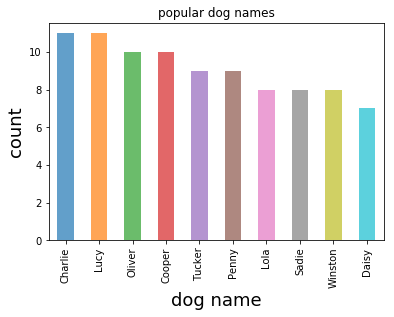

In [230]:
#Lets explor what are the most popular names?
top=df['name'].value_counts().head(10)
top.plot(kind='bar',alpha=0.7)
plt.xlabel('dog name',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('popular dog names')
plt.savefig('Popular dog names.png')


In [231]:
top

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
Penny       9
Lola        8
Sadie       8
Winston     8
Daisy       7
Name: name, dtype: int64

* the top 10 popular names for dog are Lucy, Charlie, Cooper, Oliver, Tucker, Penny, Sadie, Lola, Winston, and Daisy. 

## Favorite Dogs

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 17 columns):
tweet_id              2085 non-null int64
timestamp             2085 non-null object
source                2085 non-null object
text                  2085 non-null object
expanded_urls         2082 non-null object
rating_numerator      2085 non-null float64
rating_denominator    2085 non-null int64
name                  1423 non-null object
dog_stages            366 non-null object
id                    2083 non-null float64
retweet_count         2083 non-null float64
favorite_count        2083 non-null float64
jpg_url               1655 non-null object
img_num               1655 non-null float64
predictions           1655 non-null object
confidence            1655 non-null float64
dog_breed             1655 non-null object
dtypes: float64(6), int64(2), object(9)
memory usage: 277.0+ KB


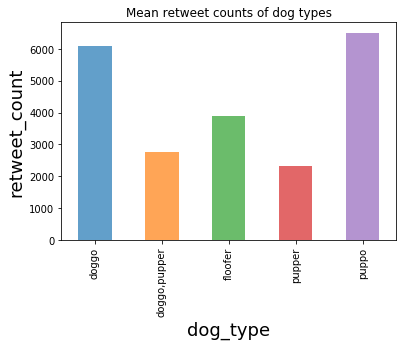

In [233]:
pop_type=df.groupby('dog_stages')['retweet_count'].mean()
pop_type.plot(kind='bar', alpha=0.7)
plt.xlabel('dog_type',fontsize=18)
plt.ylabel('retweet_count',fontsize=18)
plt.title('Mean retweet counts of dog types')
plt.savefig('Mean retweet counts of dog types.png')

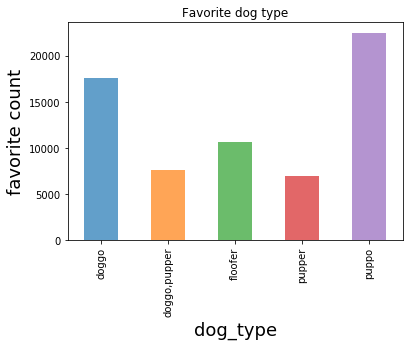

In [234]:
pop_type=df.groupby('dog_stages')['favorite_count'].mean()
pop_type.plot(kind='bar', alpha=0.7)
plt.xlabel('dog_type',fontsize=18)
plt.ylabel('favorite count',fontsize=18)
plt.title('Favorite dog type')
plt.savefig('Favorite dog type.png')

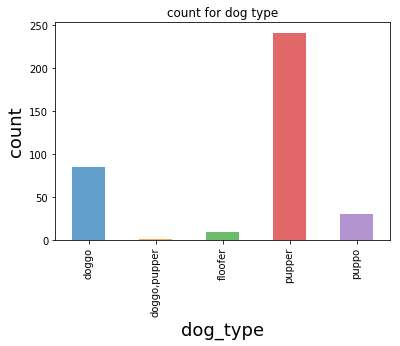

In [235]:
pop_type=df.groupby('dog_stages')['tweet_id'].count()
pop_type.plot(kind='bar', alpha=0.7)
plt.xlabel('dog_type',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('count for dog type')
plt.savefig('count for dog type.png')

* Puppers are posted on tweet most, but type of dog received the highest favorite counts are puppos. And the favorite counts are consistent with the retweet counts

## Predictions


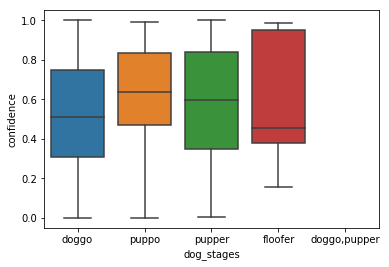

In [236]:
sns.boxplot(x='dog_stages', y= 'confidence', data=df)
plt.savefig('does the machine do good job on prediction.png')


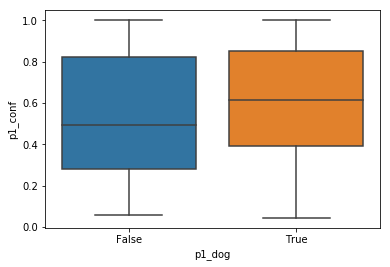

In [237]:

sns.boxplot(x='p1_dog', y= 'p1_conf', data=predictions)


* There are only 226 out of 2075 observations with p1_conf with  higher 0.95.  It seems that the probability of prediction the dog breeds is dependent on the dog types. The diagram showed that the mean confidence only for puppo is higher than 0.6. It could be because the population of puppo posted on tweeter is much less, according to the diagram of count for dog type shown above. 

In [239]:
## dog received highest retweet count, favorite count, and numerator rating
# get index
ind=df['retweet_count'].nlargest(1).index
ind



Int64Index([822], dtype='int64')

In [240]:
## image of dog received highest retweet count, 
url=df.loc[822]['jpg_url']
Image(url=url,width=150, height=150)


*  This guy received the highest retweet counts-- 83810 retweet count and 164536 favorite count !

In [241]:
## dog received highest numerator rating with pictures
top_numerator=df['rating_numerator'].nlargest(3).index
top_numerator


Int64Index([767, 1809, 981], dtype='int64')

In [242]:
#get image
url=df.loc[526]['jpg_url']
Image(url=url,width=150, height=150)

* one of the top 3 dogs received highest numerator rating with pictures

In [243]:
#find the tweet_id for the highest rated dog
id=df_clean.loc[979]['tweet_id']
ind=predictions.query('tweet_id==749981277374128128')['jpg_url']
url=predictions.loc[1270]['jpg_url']
# extract the image of the highest rated dog
Image(url=url,width=150, height=150)


*	This is Atticus. Isn’t he cute?  No wonder he is the highest rated dog to date -- 1776/10 !! 